# C3.ai COVID-19 Data Lake Quickstart in Python  

Version 5.0 (August 11, 2020).

This Jupyter notebook shows some examples of how to access and use each of the [C3.ai COVID-19 Data Lake](https://c3.ai/covid/) APIs. These examples show only a small piece of what you can do with the C3.ai COVID-19 Data Lake, but will get you started with performing your own exploration. See the [API documentation](https://c3.ai/covid-19-api-documentation/) for more details.

Please contribute your questions, answers and insights on [Stack Overflow](https://www.stackoverflow.com). Tag `c3ai-datalake` so that others can view and help build on your contributions. For support, please send email to: [covid@c3.ai](mailto:covid@c3.ai).

## Table of Contents
- [Helper methods for accessing the API](#helpers)
- [Access OutbreakLocation data](#outbreaklocation)
    - [Case counts](#outbreaklocation/casecounts)
    - [Demographics](#outbreaklocation/demographics)
    - [Mobility](#outbreaklocation/mobility)
    - [Projections](#outbreaklocation/projections)
    - [Economic indicators](#outbreaklocation/economics)
- [Access LocationExposure data](#locationexposure)
- [Access LineListRecord data](#linelistrecord)
- [Join BiologicalAsset and Sequence data](#biologicalasset)
- [Access BiblioEntry data](#biblioentry)
- [Join TherapeuticAsset and ExternalLink data](#therapeuticasset)
- [Join Diagnosis and DiagnosisDetail data](#diagnosis)
- [Access VaccineCoverage data](#vaccinecoverage)
- [Access Policy data](#policy)
- [Access LaborDetail data](#labor)
- [Access Survey data](#survey)

Import the [requests](https://requests.readthedocs.io/en/master/), [pandas>=1.0.0](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/3.2.1/index.html), and [scipy](https://www.scipy.org/) libraries before using this notebook.

In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np

Ensure that you have a recent version of pandas (>= 1.0.0).

In [3]:
print("pandas version", pd.__version__)
assert pd.__version__[0] >= "1", "To use this notebook, upgrade to the newest version of pandas. See https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html for details."


pandas version 1.1.3


<a id="helpers"></a>
## Helper methods for accessing the API

The helper methods in `c3aidatalake.py` convert a JSON response from the C3.ai APIs to a Pandas DataFrame. You may wish to view the code in `c3aidatalake.py` before using the quickstart examples.

In [4]:
import c3aidatalake

<a id="outbreaklocation"></a>
## Access OutbreakLocation data

`OutbreakLocation` stores location data such as countries, provinces, cities, where COVID-19 outbeaks are recorded. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/OutbreakLocation) for more details and for a list of available locations.

In [5]:
# Fetch facts about Germany
locations = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
#             "filter": "id == 'Australia'",
            "filter": " contains(id,'Australia')",
#             "limit":100
        }
    }
)

locations

,id,name,typeIdent,location.value.id,location.timestamp,latestTotalPopulation,populationOfAllChildren,population2019,hospitalPrediction.timestamp,fips.id,locationType,populationCDS
0,AdelaideCityCouncil_SouthAustralia_Australia,AdelaideCityCouncil,EP_LOC,AdelaideCityCouncil_SouthAustralia_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AdelaideHillsCouncil_SouthAustralia_Australia,AdelaideHillsCouncil,EP_LOC,AdelaideHillsCouncil_SouthAustralia_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Adelaide_Australia,NaN,EP_LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelaide_SouthAustralia_Australia,Adelaide,EP_LOC,Adelaide_SouthAustralia_Australia,2020-02-24T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AlexandrinaCouncil_SouthAustralia_Australia,AlexandrinaCouncil,EP_LOC,AlexandrinaCouncil_SouthAustralia_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
332,WoollahraMunicipalCouncil_NewSouthWales_Australia,WoollahraMunicipalCouncil,EP_LOC,WoollahraMunicipalCouncil_NewSouthWales_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,WyongShireCouncil_NewSouthWales_Australia,WyongShireCouncil,EP_LOC,WyongShireCouncil_NewSouthWales_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,YarraRangesShire_Victoria_Australia,YarraRangesShire,EP_LOC,YarraRangesShire_Victoria_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,YassValleyCouncil_NewSouthWales_Australia,YassValleyCouncil,EP_LOC,YassValleyCouncil_NewSouthWales_Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This helper function is just returning the json object from API response. It is used in `fetch` or `evalmetrics` methods.

In [55]:
test = c3aidatalake.read_data_json(
    "therapeuticasset",
    "fetch",
  {
    "spec": {
      "include": "productType, description, origin, links.url",
      "filter": "origin =='Milken'",
      "limit" : 3
    }
  }
)
test

{'objs': [{'productType': 'Protein subunit',
   'description': 'Spike protein; VaxiPatch microneedle array dermal patch',
   'origin': 'Milken',
   'links': [{'url': 'https://docs.google.com/document/d/1Y4nCJJ4njzD1wiHbufCY6gqfRmj49Qn_qNgOJD62Wik/edit',
     'therapeuticAsset': {'id': '007374a9199cbf884892fb90bbb8241f'},
     'id': '853981c6-8043-4b4f-85a1-17fc79941273',
     'meta': {'fetchInclude': '[id,url,therapeuticAsset,version]',
      'fetchType': 'ExternalLink'},
     'version': 1}],
   'id': '007374a9199cbf884892fb90bbb8241f',
   'meta': {'fetchInclude': '[productType,description,origin,{links:[id,url]},id,version]',
    'fetchType': 'TherapeuticAsset'},
   'version': 1},
  {'productType': 'Antibodies',
   'description': 'Remsima (infliximab), anti-TNF antibody',
   'origin': 'Milken',
   'links': [{'url': 'https://docs.google.com/document/d/1Y4nCJJ4njzD1wiHbufCY6gqfRmj49Qn_qNgOJD62Wik/edit',
     'therapeuticAsset': {'id': '01fea51894afdf874adc5a7595bbffa7'},
     'id': 'a3e

In [73]:
test = c3aidatalake.read_data_json(
    "outbreaklocation",
    "fetch",
    {
        "spec" : {
            "include": "hospitals.location, populationCDS",
            "filter": "exists(populationData) && contains(id,'UnitedKingdom')",
            "limit":15
        }
    }
)
test

{'objs': [{'id': 'Anguilla_UnitedKingdom',
   'meta': {'fetchInclude': '[{hospitals:[id,location]},populationCDS,id,version,typeIdent]',
    'fetchType': 'OutbreakLocation'},
   'version': 17498141,
   'typeIdent': 'EP_LOC'},
  {'id': 'Bermuda_UnitedKingdom',
   'meta': {'fetchInclude': '[{hospitals:[id,location]},populationCDS,id,version,typeIdent]',
    'fetchType': 'OutbreakLocation'},
   'version': 20774952,
   'typeIdent': 'EP_LOC'},
  {'id': 'BritishVirginIslands_UnitedKingdom',
   'meta': {'fetchInclude': '[{hospitals:[id,location]},populationCDS,id,version,typeIdent]',
    'fetchType': 'OutbreakLocation'},
   'version': 17629389,
   'typeIdent': 'EP_LOC'},
  {'id': 'CaymanIslands_UnitedKingdom',
   'meta': {'fetchInclude': '[{hospitals:[id,location]},populationCDS,id,version,typeIdent]',
    'fetchType': 'OutbreakLocation'},
   'version': 17629406,
   'typeIdent': 'EP_LOC'},
  {'id': 'ChannelIslands_UnitedKingdom',
   'meta': {'fetchInclude': '[{hospitals:[id,location]},populat

In [95]:
test_table = c3aidatalake.fetch(
    "populationdata",
    {
        "spec" : {
#             "include": "population2019,populationCDS, vaccineCoverage",
#             "filter": " contains(id,'UnitedKingdom') && exists(vaccineCoverage)",
            "limit":1000
        }
    }
)
test_table

,gender,race,ethnicity,populationAge,estimate,percent,value,origin,id,timestamp,parent.id,minAge,maxAge
0,Male/Female,Any race,Hispanic/Not Hispanic,Total,True,False,8150368.0,International Census Bureau,1950_Afghanistan_MidyearPopulation,1950-06-01T00:00:00Z,Afghanistan,NaN,NaN
1,Male/Female,Any race,Hispanic/Not Hispanic,Total,True,False,1227156.0,International Census Bureau,1950_Albania_MidyearPopulation,1950-06-01T00:00:00Z,Albania,NaN,NaN
2,Male/Female,Any race,Hispanic/Not Hispanic,Total,True,False,8892718.0,International Census Bureau,1950_Algeria_MidyearPopulation,1950-06-01T00:00:00Z,Algeria,NaN,NaN
3,Male/Female,Any race,Hispanic/Not Hispanic,Total,True,False,19100.0,International Census Bureau,1950_AmericanSamoa_UnitedStates_MidyearPopulation,1950-06-01T00:00:00Z,AmericanSamoa_UnitedStates,NaN,NaN
4,Male/Female,Any race,Hispanic/Not Hispanic,Total,True,False,6176.0,International Census Bureau,1950_Andorra_MidyearPopulation,1950-06-01T00:00:00Z,Andorra,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,Any race,Hispanic/Not Hispanic,7,True,False,2364.0,International Census Bureau,1951_Bhutan_7Years_Male,1951-06-01T00:00:00Z,Bhutan,NaN,NaN
996,Female,Any race,Hispanic/Not Hispanic,80-84,True,False,157.0,International Census Bureau,1951_Bhutan_80To84_MidyearFemalePopulation,1951-06-01T00:00:00Z,Bhutan,80.0,84.0
997,Male,Any race,Hispanic/Not Hispanic,80-84,True,False,149.0,International Census Bureau,1951_Bhutan_80To84_MidyearMalePopulation,1951-06-01T00:00:00Z,Bhutan,80.0,84.0
998,Male/Female,Any race,Hispanic/Not Hispanic,80-84,True,False,306.0,International Census Bureau,1951_Bhutan_80To84_MidyearPopulation,1951-06-01T00:00:00Z,Bhutan,80.0,84.0


In [90]:
test_table = c3aidatalake.fetch(
    "vaccinecoverage",
    {
        "spec" : {
#             "include": "population2019,populationCDS, vaccineCoverage",
#             "filter": " contains(id,'UnitedKingdom') && exists(vaccineCoverage)",
            "limit":1000
        }
    }
)
test_table

,vaxView,year,timestamp,value,lowerLimit,upperLimit,sampleSize,confidenceInterval,vaccineDetails,demographicClass,demographicClassDetails,id,location.id,target,totalPopulation,surveyType,other,difference,kindergartenPopulation,percentSurveyed
0,Child,2001,2001-01-01T00:00:00Z,92.2,89.1,94.4,562.0,2.7,>=3 doses Hib Vaccination,Age,24 Months,00000cba-509c-4504-b1f7-ccd44cfe6b42,Indiana_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Child,2003,2003-01-01T00:00:00Z,77.3,61.4,87.9,54.0,13.3,Combined 4 Series Vaccination,Facility Type,Other,00001124-80e5-4c0e-9269-60331d7113eb,NewMexico_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Child,2010,2010-01-01T00:00:00Z,75.7,68.5,81.7,332.0,6.6,>=4 doses PCV Vaccination,Age,19 Months,00001dc5-f5fa-499e-bdf5-8d6261e85833,NewJersey_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Child,2017,2017-01-01T00:00:00Z,76.9,75.3,78.5,11392.0,1.6,Combined 5 Series Vaccination,Poverty,Living At or Above Poverty,00004b3a-28f5-4b34-a998-1833a1aded32,UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Influenza,2015,2015-01-01T00:00:00Z,45.3,38.1,52.5,461.0,7.2,Influenza vaccination (General Population),Age,13-17 years,00006fab-7d97-4bb7-ade2-0fb8beefce45,Kentucky_UnitedStates,70.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Influenza,2014,2014-01-01T00:00:00Z,56.0,34.5,75.4,32.0,21.6,Influenza vaccination (Pregnant Women),Race/ethnicity,"Other or multiple races, non-Hispanic",0053e5a5-45dd-4fb6-9efa-a61d3d21bf46,Tennessee_UnitedStates,NaN,NaN,NaN,NaN,-14.0,NaN,NaN
996,Child,1998,1998-01-01T00:00:00Z,68.0,62.0,73.5,281.0,5.8,Combined 5 Series Vaccination,Age,19 Months,0053ec89-3342-43bd-8aaa-570e64f35953,Connecticut_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Child,2004,2004-01-01T00:00:00Z,48.4,30.5,66.7,33.0,19.0,>=4 doses PCV Vaccination,Facility Type,Other,00540ddb-2936-46de-bf79-4b2796dfeda0,Idaho_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Child,1999,1999-01-01T00:00:00Z,64.5,51.4,75.8,77.0,12.4,Combined 5 Series Vaccination,Race/Ethnicity,"Black only, non-Hispanic",005412c3-3ab2-4bfd-aea4-95377a047e50,Davidson_Tennessee_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="outbreaklocation/casecounts"></a>
### Case counts

A variety of sources provide counts of cases, deaths, recoveries, and other statistics for counties, provinces, and countries worldwide.

In [149]:
# Total number of confirmed cases, deaths, and recoveries in Santa Clara, California
today = pd.Timestamp.now().strftime("%Y-%m-%d")

casecounts = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Germany","Iran"],
            "expressions": ["AverageDailyTemperature"],
            "start" : "2019-10-25",
            "end" : today,
            "interval" : "MONTH",
        }
    }
)

casecounts

,dates,Iran.AverageDailyTemperature.data,Iran.AverageDailyTemperature.missing,Germany.AverageDailyTemperature.data,Germany.AverageDailyTemperature.missing
0,2019-10-01,71.7248,0,51.9671,0
0,2019-11-01,50.7378,0,40.8347,0
0,2019-12-01,49.0161,0,38.6922,0
0,2020-01-01,42.789,0,38.0968,0
0,2020-02-01,53.4612,0,41.4784,0
0,2020-03-01,58.8649,0,41.1599,0
0,2020-04-01,67.866,0,50.0097,0
0,2020-05-01,80.5981,0,52.4516,0
0,2020-06-01,91.3229,0,61.5486,0
0,2020-07-01,92.2776,0,63.7231,0


Plot these counts.

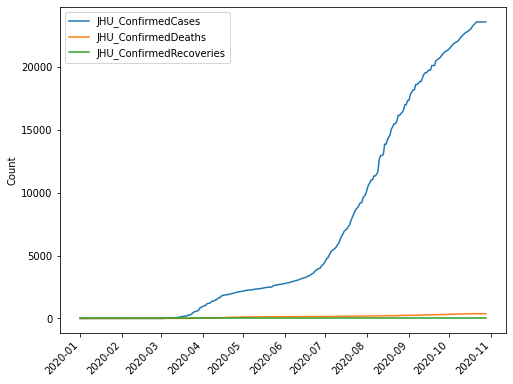

In [8]:
plt.figure(figsize = (8, 6))
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedCases.data"],
    label = "JHU_ConfirmedCases"
)
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedDeaths.data"],
    label = "JHU_ConfirmedDeaths"
)
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedRecoveries.data"],
    label = "JHU_ConfirmedRecoveries"
)
plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Count")
plt.show()

Export case counts as a .csv file.

In [ ]:
# Uncomment the line below to export the DataFrame as a .csv file
# casecounts.to_csv("casecounts.csv")

<a id="outbreaklocation/demographics"></a>
### Demographics

Demographic and economic data from the US Census Bureau and The World Bank allow demographic comparisons across locations. 

In [9]:
population = c3aidatalake.fetch(
    "populationdata",
    {
        "spec" : {
            "filter" : "!contains(parent, '_') && (populationAge == '>=65' || populationAge == 'Total') && gender == 'Male/Female' && year == '2018' && estimate == 'False' && percent == 'False'"
        }
    },
    get_all = True
)

population

,year,gender,race,ethnicity,populationAge,estimate,median,percent,value,minAge,origin,id,timestamp,parent.id
0,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,960879.0,65.0,World Bank,2018_Afghanistan_Male/Female_>=65_Count_SP.POP...,2018-01-01T00:00:00Z,Afghanistan
1,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,37172386.0,NaN,World Bank,2018_Afghanistan_Male/Female_Total_Count_SP.PO...,2018-01-01T00:00:00Z,Afghanistan
2,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,393976.0,65.0,World Bank,2018_Albania_Male/Female_>=65_Count_SP.POP.65U...,2018-01-01T00:00:00Z,Albania
3,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,2866376.0,NaN,World Bank,2018_Albania_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Albania
4,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,2686782.0,65.0,World Bank,2018_Algeria_Male/Female_>=65_Count_SP.POP.65U...,2018-01-01T00:00:00Z,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,28498687.0,NaN,World Bank,2018_Yemen_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Yemen
480,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,364332.0,65.0,World Bank,2018_Zambia_Male/Female_>=65_Count_SP.POP.65UP.TO,2018-01-01T00:00:00Z,Zambia
481,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,17351822.0,NaN,World Bank,2018_Zambia_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Zambia
482,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,424438.0,65.0,World Bank,2018_Zimbabwe_Male/Female_>=65_Count_SP.POP.65...,2018-01-01T00:00:00Z,Zimbabwe


In [151]:
linelist = c3aidatalake.fetch(
    "linelistrecord",
    {
    "spec": {
        "filter": "gender == 'male' && lineListSource == 'OPEN' && age <= 20 && contains(relevantTravelHistoryLocation,'Wuhan')"
   }
    },
    remove_meta=False
)

linelist

,age,gender,caseConfirmationDate,livesInGroundZero,traveledToGroundZero,relevantTravelHistoryLocation,relevantTravelHistoryDates,notes,recordSource,lineListSource,hasTravelHistory,id,version,location.id,meta.tenantTagId,meta.tenant,meta.tag,meta.created,meta.createdBy,meta.updated,meta.updatedBy,meta.timestamp,meta.sourceFile,meta.fetchInclude,meta.fetchType,symptomStartDate,hospitalAdmissionDate,outcome,didDie,didRecover,outcomeDate
0,7.0,male,2020-02-08T00:00:00Z,True,True,"Guiyang City, Guizhou; Wuhan City, Hubei; Zhao...",23.01.2020 - 05.02.2020,"from Huangshi, Hubei",http://www.bjnews.com.cn/feature/2020/02/09/68...,OPEN,False,000-1-10713,65537,Yunnan_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:33:46Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,male,2020-02-08T00:00:00Z,False,True,"Huangshi City, Hubei; Wuhan City, Hubei; Guiya...",23.01.2020,Case 140,http://ynswsjkw.yn.gov.cn/wjwWebsite/web/doc/U...,OPEN,False,000-1-10715,65537,ZhaotongCity_Yunnan_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:33:48Z,LATESTLINELISTDATA.csv,[],LineListRecord,2020-02-05T00:00:00Z,2020-02-05T00:00:00Z,NaN,NaN,NaN,NaN
2,10.0,male,2020-02-10T00:00:00Z,True,True,"Wuhan City, Hubei; Lijiang City, Yunnan",24.01.2020,Case 148 family isolated for medical observati...,http://ynswsjkw.yn.gov.cn/wjwWebsite/web/doc/U...,OPEN,False,000-1-10723,65537,DaliPrefecture_Yunnan_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:33:47Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,2020-02-10T00:00:00Z,NaN,NaN,NaN,NaN
3,1.0,male,2020-02-16T00:00:00Z,False,True,"Wuhan City, Hubei",- 09.02.2020,Case 76; Singapore Citizen who was among the g...,https://bnonews.com/wp-content/uploads/2020/02...,OPEN,False,000-1-110,65537,KKWomen’sandChildren’sHospital__Singapore,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:33:49Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,NaN,discharge,False,True,2020-02-18T00:00:00Z
4,7.0,male,2020-01-26T00:00:00Z,True,True,"Wuhan City, Hubei",24.01.2020,In hospital for isolation and observation,https://wsjkw.qinghai.gov.cn/zhxw/xwzx/2020/01...,OPEN,False,000-1-142,65537,XiningCity_Qinghai_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:42:18Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,2020-01-24T00:00:00Z,discharged,False,True,2020-02-05T00:00:00Z
5,8.0,male,2020-01-27T00:00:00Z,True,True,"Wuhan City, Hubei",23.01.2020,Hainan Case 35,http://wst.hainan.gov.cn/swjw/rdzt/yqfk/202002...,OPEN,False,000-1-1629,65537,SanyaCity_Hainan_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:49:03Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,2020-01-25T00:00:00Z,NaN,NaN,NaN,NaN
6,5.0,male,2020-01-28T00:00:00Z,True,False,"Wuhan City, Hubei",NaN,NaN,http://wjw.jxfz.gov.cn/art/2020/1/28/art_9866_...,OPEN,False,000-1-2203,65537,FuzhouCity_Jiangxi_China,4,covid,prod,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:29:01Z,dataloader,2020-09-13T15:54:03Z,LATESTLINELISTDATA.csv,[],LineListRecord,NaN,2020-01-23T00:00:00Z,NaN,NaN,NaN,NaN


In [16]:
population_age_distribution = population.loc[
    :, 
    ["populationAge", "parent.id", "value"]
].pivot(index = "parent.id", columns = "populationAge")['value']
population_age_distribution["proportion_over_65"] = population_age_distribution[">=65"] / population_age_distribution["Total"]

population_age_distribution.

populationAge,>=65,Total,proportion_over_65
parent.id,,,
Afghanistan,960879.0,3.717239e+07,0.025849
Albania,393976.0,2.866376e+06,0.137447
Algeria,2686782.0,4.222843e+07,0.063625
Andorra,NaN,7.700600e+04,NaN
Angola,682859.0,3.080976e+07,0.022164
...,...,...,...
WestBankandGaza,143163.0,4.569087e+06,0.031333
World,673618927.0,7.594270e+09,0.088701
Yemen,819699.0,2.849869e+07,0.028763


Access global death counts.

In [18]:
global_deaths = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : list(population_age_distribution.index),
            "expressions" : ["JHU_ConfirmedDeaths"],
            "start" : "2020-05-01",
            "end" : "2020-05-01",
            "interval" : "DAY",
        }
    },
    get_all = True
)

global_deaths.transform()

TypeError: transform() missing 1 required positional argument: 'func'

In [ ]:
global_deaths_by_country = global_deaths.filter(regex=("\.data")).melt()
global_deaths_by_country["country"] = global_deaths_by_country["variable"].str.replace("\..*", "")

global_comparison = global_deaths_by_country.set_index("country").join(population_age_distribution)
global_comparison["deaths_per_million"] = 1e6 * global_comparison["value"] / global_comparison["Total"] 
global_comparison

Plot the results.

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(
    global_comparison["proportion_over_65"],
    global_comparison["deaths_per_million"]
)
plt.xlabel("Proportion of population over 65")
plt.ylabel("Confirmed COVID-19 deaths\nper million people")
plt.show()

<a id="outbreaklocation/mobility"></a>
### Mobility

Mobility data from Apple and Google provide a view of the impact of COVID-19 and social distancing on mobility trends.

In [152]:
mobility_trends = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["DistrictofColumbia_UnitedStates"],
            "expressions" : [
                "Apple_WalkingMobility", 
                "Apple_DrivingMobility",
                "Google_ParksMobility",
                "Google_ResidentialMobility"
              ],
            "start" : "2020-03-01",
            "end" : "2020-04-01",
            "interval" : "DAY",
        }
    },
    get_all = True
)

mobility_trends

,dates,DistrictofColumbia_UnitedStates.Apple_WalkingMobility.data,DistrictofColumbia_UnitedStates.Apple_WalkingMobility.missing,DistrictofColumbia_UnitedStates.Apple_DrivingMobility.data,DistrictofColumbia_UnitedStates.Apple_DrivingMobility.missing,DistrictofColumbia_UnitedStates.Google_ResidentialMobility.data,DistrictofColumbia_UnitedStates.Google_ResidentialMobility.missing,DistrictofColumbia_UnitedStates.Google_ParksMobility.data,DistrictofColumbia_UnitedStates.Google_ParksMobility.missing
0,2020-03-01,113.18,0,96.56,0,98,0,100,0
0,2020-03-02,104.74,0,106.99,0,100,0,99,0
0,2020-03-03,113.76,0,110.98,0,99,0,102,0
0,2020-03-04,120.47,0,112.23,0,99,0,108,0
0,2020-03-05,116.91,0,115.66,0,100,0,106,0
...,...,...,...,...,...,...,...,...,...
0,2020-03-27,46.98,0,58.72,0,127,0,55,0
0,2020-03-28,38.3,0,47.84,0,117,0,31,0
0,2020-03-29,41.06,0,42.06,0,114,0,59,0
0,2020-03-30,43.29,0,50.94,0,126,0,53,0


Plot these mobility trends.

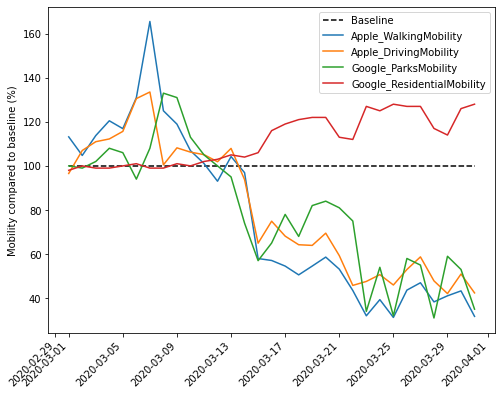

In [153]:
plt.figure(figsize = (8, 6))
plt.plot(
    mobility_trends["dates"],
    [100 for d in mobility_trends["dates"]],
    label = "Baseline",
    linestyle = "dashed",
    color = "black"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Apple_WalkingMobility.data"],
    label = "Apple_WalkingMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Apple_DrivingMobility.data"],
    label = "Apple_DrivingMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Google_ParksMobility.data"],
    label = "Google_ParksMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Google_ResidentialMobility.data"],
    label = "Google_ResidentialMobility"
)
plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Mobility compared to baseline (%)")
plt.show()

<a id="outbreaklocation/projections"></a>
### Projections

Use the `GetProjectionHistory` API to retrieve versioned time series projections for specific metrics made at specific points in time.

In [ ]:
# Retrieve projections made between April 13 and May 1 of mean total cumulative deaths in Spain from April 13 to May 13
projections = c3aidatalake.getprojectionhistory(
    {
        "outbreakLocation": "Spain", 
        "metric": "UniversityOfWashington_TotdeaMean_Hist",
        "metricStart": "2020-04-13", 
        "metricEnd": "2020-05-13",
        "observationPeriodStart": "2020-04-13",
        "observationPeriodEnd": "2020-05-01"
    }
)

projections

In [ ]:
# Retrieve actual total cumulative deaths in Spain from April 1 to May 13
deaths = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Spain"],
            "expressions" : ["JHU_ConfirmedDeaths"],
            "start" : "2020-04-01",
            "end" : "2020-05-13",
            "interval" : "DAY",
        }
    }
)

deaths

Plot the results.

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(
    deaths["dates"],
    deaths["Spain.JHU_ConfirmedDeaths.data"],
    label = "JHU_ConfirmedDeaths",
    color = "black"
)
for col in projections.columns:
    if 'data' in col:
        expr = projections[col.replace("data", "expr")].iloc[0]
        projection_date = pd.to_datetime(expr.split(" ")[-1])
        plt.plot(
            projections.loc[projections["dates"] >= projection_date, "dates"],
            projections.loc[projections["dates"] >= projection_date, col],
            label = expr
        )

plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Count")
plt.title("Cumulative death count projections versus actual count")
plt.show()

<a id="outbreaklocation/economics"></a>
### Economic indicators

GDP and employment statistics by business sector from the US Bureau of Economic Analysis enable comparisons of the drivers of local economies. 

In [ ]:
# Real GDP for AccommodationAndFoodServices and FinanceAndInsurance in Alameda County, California

realgdp = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec": {
              "ids": ["Alameda_California_UnitedStates"], 
              "expressions": [
                "BEA_RealGDP_AccommodationAndFoodServices_2012Dollars",
                "BEA_RealGDP_FinanceAndInsurance_2012Dollars"

              ], 
              "start": "2000-01-01", 
              "end": "2020-01-01", 
              "interval":"YEAR"
        }
    }
)

realgdp

High frequency spending and earnings data from Opportunity Insights allow tracking of near real-time economic trends.

In [ ]:
# Access consumer spending in healthcare and low income earnings in the healthcare and social assistance sector in California
opportunityinsights = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec": {
            "ids": ["California_UnitedStates"], 
            "expressions": [
                "OIET_Affinity_SpendHcs",
                "OIET_LowIncEmpAllBusinesses_Emp62"
            ], 
            "start": "2020-01-01", 
            "end": "2020-06-01", 
            "interval":"DAY"
        }
    }
)
    
opportunityinsights

Plot the results.

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(
    opportunityinsights.dates,
    opportunityinsights['California_UnitedStates.OIET_Affinity_SpendHcs.data'] * 100,
    label = 'Consumer spending in healthcare'
)

plt.plot(
    opportunityinsights.dates,
    opportunityinsights['California_UnitedStates.OIET_LowIncEmpAllBusinesses_Emp62.data'] * 100,
    label = 'Low income earnings in\nhealthcare & social assistance '
)

plt.legend()
plt.title("California low-income earnings and consumer spending in healthcare")
plt.xlabel("Date")
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Change relative to January 4-31 (%)")

plt.show()

<a id="locationexposure"></a>
## Access Location Exposure data

`LocationExposure` stores information based on the movement of people's mobile devices across locations over time. It stores the following:  
* Location exposure index (LEX) for a pair of locations (`locationTarget`, `locationVisited`): the fraction of mobile devices that pinged in `locationTarget` on a date that also pinged in `locationVisited` at least once during the previous 14 days. The pair (`locationTarget`, `locationVisited`) can be two county locations or two state locations.
* Device count: the number of distinct mobile devices that pinged at `locationTarget` on the date.

See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LocationExposures) for more details. 

In [ ]:
exposure = c3aidatalake.read_data_json(
    "locationexposure",
    "getlocationexposures",
    {
        "spec":
        {
            "locationTarget": "California_UnitedStates",
            "locationVisited": "Nevada_UnitedStates",
            "start": "2020-01-20",
            "end": "2020-04-25"
        }
    }
    
)

Access daily LEX where `locationTarget` is California and `locationVisited` is Nevada with the the `locationExposures` field.

In [ ]:
lex = pd.json_normalize(exposure["locationExposures"]["value"])

lex

Plot the LEX data to see the proportion of devices in California on each date that pinged in Nevada over the previous 14 days.

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(
    pd.to_datetime(lex["timestamp"]),
    lex["value"]
)
plt.ylabel("Location exposure index (LEX)")
plt.title("Location exposure for target location California and visited location Nevada")
plt.show()

Access daily device counts with the `deviceCounts` field.

In [ ]:
pd.json_normalize(exposure["deviceCounts"]["value"])

<a id="linelistrecord"></a>
## Access LineListRecord data

`LineListRecord` stores individual-level crowdsourced information from laboratory-confirmed COVID-19 patients. Information includes gender, age, symptoms, travel history, location, reported onset, confirmation dates, and discharge status. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LineListRecord) for more details.

In [162]:
# Fetch the line list records tracked by MOBS Lab
records = c3aidatalake.fetch(
    "linelistrecord",
    {
        "spec" : {
            "filter" : "lineListSource == 'DXY' && exists(symptoms)"
        }
    },
    get_all = True
)

records

,age,gender,symptoms,symptomStartDate,hospitalAdmissionDate,caseConfirmationDate,livesInGroundZero,traveledToGroundZero,traveler,internationTraveler,domesticTraveler,notes,outcome,didDie,didRecover,recordSource,lineListSource,hasTravelHistory,id,location.id,exposureEndDate,caseInCountry,exposureStartDate
0,28.0,female,"feaver, cough, difficult in breathing",2020-01-07T00:00:00Z,2020-01-10T00:00:00Z,2020-01-27T00:00:00Z,False,False,False,False,False,new recovered COVID-19 pneumonia patient in Hu...,open,False,False,人民日报: https://m.weibo.cn/status/4465382079294013?,DXY,False,195,Hubei_China,NaN,NaN,NaN
1,51.0,female,"feaver, cough, difficult in breathing",NaN,2020-01-11T00:00:00Z,2020-01-27T00:00:00Z,False,False,False,False,False,new recovered COVID-19 pneumonia patient in Hu...,open,False,False,人民日报: https://m.weibo.cn/status/4465382079294013?,DXY,False,196,Hubei_China,NaN,NaN,NaN
2,37.0,male,fever,NaN,2020-01-17T00:00:00Z,2020-01-27T00:00:00Z,False,False,False,False,False,new recovered COVID-19 pneumonia patient in Sh...,open,False,False,人民日报: https://m.weibo.cn/status/4465385308652598?,DXY,False,197,Shandong_China,NaN,NaN,NaN
3,35.0,male,fever,2020-01-03T00:00:00Z,2020-01-06T00:00:00Z,2020-01-15T00:00:00Z,False,False,False,False,False,"new confirmed COVID-19 patient in Japan: male,...",open,False,False,HK World-Japan: https://www3.nhk.or.jp/nhkworl...,DXY,False,254,Kanagawa_Japan,2020-01-06T00:00:00Z,1.0,NaN
4,45.0,male,fever,2020-01-22T00:00:00Z,2020-01-26T00:00:00Z,2020-01-28T00:00:00Z,False,False,False,False,False,"new confirmed COVID-19 patient in Japan: male,...",open,False,False,Kyodo News: https://english.kyodonews.net/news...,DXY,False,258,AichiPrefecture_Japan,2020-01-20T00:00:00Z,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,NaN,male,fever,2020-01-19T00:00:00Z,2020-01-19T00:00:00Z,2020-01-22T00:00:00Z,False,False,False,False,False,new confirmed COVID-19 patient in Thailand: ma...,open,False,False,Channel News Asia: https://www.channelnewsasia...,DXY,False,908,Thailand,NaN,5.0,NaN
334,33.0,female,"fever, coughing, muscle aches",2020-01-23T00:00:00Z,2020-01-23T00:00:00Z,2020-01-24T00:00:00Z,False,False,False,False,False,new confirmed COVID-19 patient in Thailand: fe...,open,False,False,Channel News Asia: https://www.channelnewsasia...,DXY,False,909,Thailand,2020-01-21T00:00:00Z,6.0,NaN
335,NaN,male,cough,NaN,2020-02-23T00:00:00Z,2020-02-26T00:00:00Z,False,False,False,False,False,new confirmed COVID-19 patient in Thailand: ma...,open,False,False,South China Morning Post: https://www.scmp.com...,DXY,False,941,Thailand,NaN,38.0,NaN
336,25.0,male,"fever, cough",NaN,2020-02-25T00:00:00Z,2020-02-28T00:00:00Z,False,False,False,False,False,new confirmed COVID-19 patient in Thailand: ma...,open,False,False,Bangkok Post: https://www.bangkokpost.com/thai...,DXY,False,944,Thailand,NaN,41.0,NaN


What are the most common symptoms in this dataset?

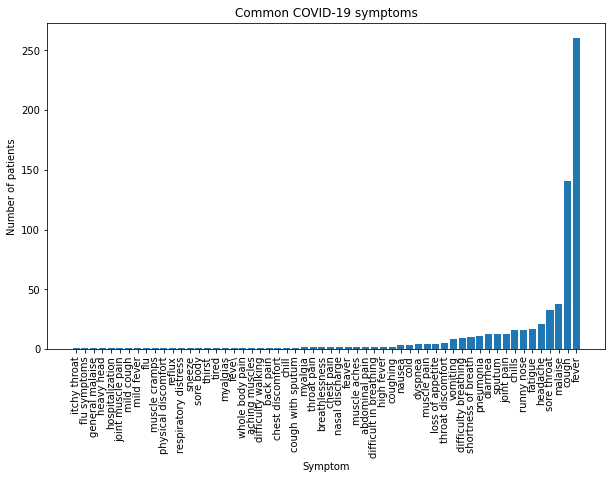

In [155]:
# Get all the symptoms, which are initially comma-separated
symptom_df = records.copy()
symptom_df["symptoms"] = symptom_df["symptoms"].str.split(", ")
symptom_df = symptom_df.explode("symptoms")
symptom_df = symptom_df.dropna(subset = ["symptoms"])
symptom_freq = symptom_df.groupby(["symptoms"]).agg("count")[["id"]].sort_values("id")

# Plot the data
plt.figure(figsize = (10, 6))
plt.bar(symptom_freq.index, symptom_freq["id"])
plt.xticks(rotation = 90)
plt.xlabel("Symptom")
plt.ylabel("Number of patients")
plt.title("Common COVID-19 symptoms")
plt.show()

If a patient is symptomatic and later hospitalized, how long does it take for them to become hospitalized after developing symptoms?

In [ ]:
# Get the number of days from development of symptoms to hospitalization for each patient
hospitalized = records.dropna(subset = ["hospitalAdmissionDate", "symptomStartDate"])
hospitalization_time = np.array(
    pd.to_datetime(hospitalized['hospitalAdmissionDate']) - pd.to_datetime(hospitalized['symptomStartDate'])
).astype('timedelta64[D]').astype('float')
hospitalization_time = hospitalization_time[hospitalization_time >= 0]

# Hospitalization time of 0 days is replaced with 0.1 to indicate near-immediate hospitalization
hospitalization_time[hospitalization_time <= 0.1] = 0.1

# Fit a gamma distribution
a, loc, scale = gamma.fit(hospitalization_time, floc = 0)
dist = gamma(a, loc, scale)

# Plot the results
x = np.linspace(0, np.max(hospitalization_time), 1000)
n_bins = int(np.max(hospitalization_time) + 1)
print(n_bins)

plt.figure(figsize = (10, 6))
plt.hist(
    hospitalization_time, 
    bins = n_bins, 
    range = (0, np.max(hospitalization_time)), 
    density = True, 
    label = "Observed"
)
plt.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label = 'Gamma distribution')
plt.ylim(0, 0.5)
plt.xlabel("Days from development of symptoms to hospitalization")
plt.ylabel("Proportion of patients")
plt.title("Distribution of time to hospitalization")
plt.legend()
plt.show()

<a id="biologicalasset"></a>
## Join BiologicalAsset and Sequence data

`BiologicalAsset` stores the metadata of the genome sequences collected from SARS-CoV-2 samples in the National Center for Biotechnology Information Virus Database. `Sequence` stores the genome sequences collected from SARS-CoV-2 samples in the National Center for Biotechnology Information Virus Database. See the API documentation for [BiologicalAsset](https://c3.ai/covid-19-api-documentation/#tag/BiologicalAsset) and [Sequence](https://c3.ai/covid-19-api-documentation/#tag/Sequence) for more details.

In [ ]:
# Join data from BiologicalAsset & Sequence
sequences = c3aidatalake.fetch(
  "biologicalasset",
  {
    "spec" : {
      "include" : "this, sequence.sequence",
      "filter" : "exists(sequence.sequence)"
    }
  }
)

sequences

<a id="biblioentry"></a>
## Access BiblioEntry data

`BiblioEntry` stores the metadata about the journal articles in the CORD-19 Dataset. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/BiblioEntry) for more details.

In [164]:
# Fetch metadata for the first two thousand (2000) BiblioEntry journal articles approved for commercial use
# Note that 2000 records are returned; the full dataset can be accessed using the get_all = True argument in fetch
bibs = c3aidatalake.fetch(
  "biblioentry",
  {
      "spec" : {
      }
  }
)

# Sort them to get the most recent articles first
bibs["publishTime"] = pd.to_datetime(bibs["publishTime"])
bibs = bibs.sort_values("publishTime", ascending = False)

bibs

,source,title,license,publishTime,authors,journal,idMsftPaper,whoCovidence,id,abstractText,sha,doi,pmcid,pubmedId,url,arxiv_id
1410,Elsevier;PMC,Chapter4HumanViruses:EmergenceandEvolution,els-covid,2020-12-31,"Sudhan,ShashiS.;Sharma,Preeti",EmergingandReemergingViralPathogens,204684770,NaN,0604jed8,Abstract Many new viruses have emerged in the ...,NaN,10.1016/b978-0-12-819400-3.00004-1,PMC7149643,NaN,https://api.elsevier.com/content/article/pii/B...,NaN
782,Elsevier,Preliminaryexperimentalanalysisofthesurfacetop...,els-covid,2020-12-31,"Bordatchev,EvgueniV.;Cvijanovic,SrdjanJ.;Tutun...",ProcediaManufacturing,219981593,NaN,03b1t37r,Abstract Surface finish is one of the most imp...,7585fdaa2de7563512e0402f2e4e774b9bf6a890,10.1016/j.promfg.2020.05.033,NaN,NaN,https://api.elsevier.com/content/article/pii/S...,NaN
1169,Elsevier,Blankgeometrydesignforcarbonfiberreinforcedpla...,els-covid,2020-12-31,"Zhang,Weizhao;Gao,Jiaying;Cao,Jian",ProcediaManufacturing,219983446,NaN,04yhi6nw,Abstract Carbon fiber reinforced plastics (CFR...,0fdc0d5e03f4ffc18d7ebb8d963743e6ec350895,10.1016/j.promfg.2020.05.038,NaN,NaN,https://api.elsevier.com/content/article/pii/S...,NaN
104,Medline,COVID2019pandemic:atruedigitalrevolutionandbir...,unk,2020-12-01,"Bentata,Yassamine",Medicaleducationonline,219900703,NaN,00hp8eub,NaN,NaN,10.1080/10872981.2020.1781378,NaN,32552578,https://doi.org/10.1080/10872981.2020.1781378;...,NaN
565,Elsevier;PMC,SC349TelemedicineduringCOVID-19pandemicbyatert...,els-covid,2020-10-31,"Sampogna,G.;Zanollo,L.G.;Rizzato,L.;Spinelli,A...",EuropeanUrologyOpenScience,221820340,NaN,02glnf8t,NaN,NaN,10.1016/s2666-1683(20)35671-8,PMC7500912,NaN,https://api.elsevier.com/content/article/pii/S...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,Medline,BacktoWhatSchool?,unk,1959-01-01,"T,J",Science,27463277,NaN,07by85bu,NaN,NaN,NaN,NaN,17816321,https://www.ncbi.nlm.nih.gov/pubmed/17816321/,NaN
1747,Medline,PATHOGENESISoffever.,unk,1958-01-01,NaN,Britishmedicaljournal,38890981,NaN,07egy67k,NaN,NaN,NaN,NaN,13572924,https://www.ncbi.nlm.nih.gov/pubmed/13572924/,NaN
1031,PMC,ACUTEHEPATITISASSOCIATEDWITHMOUSELEUKEMIA:V.TH...,cc-by-nc-sa,1955-10-31,"Nelson,JohnB.",JExpMed,NaN,NaN,04ceiyko,Observations on the behavior of MHV (Pr) in th...,NaN,NaN,PMC2136532,13271673,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN
1202,PMC,EinzelreferateundBuchbesprechungen,no-cc,1922-01-01,Rosenow;Simon;Weigert;Seligmann;Braun;Oppenhei...,KlinWochenschr,NaN,NaN,053gt4x1,NaN,97c6cbe4dc82dbeb9bbe64dfa7001badad83fc99,10.1007/bf01711302,PMC7095924,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN


Use `GetArticleMetadata` to access the full-text of these articles, or in this case, the first page text.

In [165]:
bib_id = bibs.loc[0, "id"] 
print(bib_id)

article_data = c3aidatalake.read_data_json(
    "biblioentry",
    "getarticlemetadata",
    {
        "ids" : [bib_id]
    }
)

article_data["value"]["value"][0]["body_text"][0]["text"]

0002xs6a


IndexError: list index out of range

<a id="therapeuticasset"></a>
## Join TherapeuticAsset and ExternalLink data

`TherapeuticAsset` stores details about the research and development (R&D) of coronavirus therapies, for example, vaccines, diagnostics, and antibodies. `ExternalLink` stores website URLs cited in the data sources containing the therapies stored in the TherapeuticAssets C3.ai Type. See the API documentation for [TherapeuticAsset](https://c3.ai/covid-19-api-documentation/#tag/TherapeuticAsset) and [ExternalLink](https://c3.ai/covid-19-api-documentation/#tag/ExternalLink) for more details.

In [ ]:
# Join data from TherapeuticAsset and ExternalLink (productType, description, origin, and URL links)
assets = c3aidatalake.fetch(
  "therapeuticasset",
  {
      "spec" : {
          "include" : "productType, description, origin, links.url",
          "filter" : "origin == 'Milken'"
      }
  }
)

assets = assets.explode("links")
assets["links"] = [link["url"] if type(link) == dict and "url" in link.keys() else None for link in assets["links"]]
assets

<a id="diagnosis"></a>
## Join Diagnosis and DiagnosisDetail data

`Diagnosis` stores basic clinical data (e.g. clinical notes, demographics, test results, x-ray or CT scan images) about individual patients tested for COVID-19, from research papers and healthcare institutions. 


`DiagnosisDetail` stores detailed clinical data (e.g. lab tests, pre-existing conditions, symptoms) about individual patients in key-value format. See the API documentation for [Diagnosis](https://c3.ai/covid-19-api-documentation/#tag/Diagnosis) and [DiagnosisDetail](https://c3.ai/covid-19-api-documentation/#tag/DiagnosisDetail) for more details.

In [ ]:
diagnoses = c3aidatalake.fetch(
  "diagnosis",
  {
      "spec" : {
          "filter" : "contains(testResults, 'COVID-19')", 
          "include" : "this, diagnostics.source, diagnostics.key, diagnostics.value"
      }
  }
)

diagnoses

In [ ]:
diagnoses_long = diagnoses.explode("diagnostics")
diagnoses_long = pd.concat([
    diagnoses_long.reset_index(),
    pd.json_normalize(
        diagnoses_long.loc[diagnoses_long.source != 'UCSD', "diagnostics"]
    )[["key", "value"]]
], axis = 1).drop(columns = "diagnostics")
diagnoses_long

In [ ]:
diagnoses_wide = (
    diagnoses_long
    .loc[~diagnoses_long[['key', 'value']].isna().all(axis=1)]
    .pivot(columns = "key", values = "value")
)
diagnoses_wide = pd.concat([diagnoses, diagnoses_wide], axis = 1).drop(columns = "diagnostics")
diagnoses_wide

Use the `GetImageURLs` API to view the image associated with a diagnosis.

In [ ]:
diagnosis_id = diagnoses_wide.loc[0, "id"] 
print(diagnosis_id)

image_urls = c3aidatalake.read_data_json(
    "diagnosis",
    "getimageurls",
    {
        "ids" : [diagnosis_id]
    }
)

print(image_urls["value"][diagnosis_id]["value"])

<a id="vaccinecoverage"></a>
## Access VaccineCoverage data

`VaccineCoverage` stores historical vaccination rates for various demographic groups in US counties and states, based on data from the US Centers for Disease Control (CDC). See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/VaccineCoverage) for more details.

In [ ]:
vaccine_coverage = c3aidatalake.fetch(
  "vaccinecoverage",
  {
      "spec" : {
          "filter" : "vaxView == 'Influenza' && contains(vaccineDetails, 'General Population') && (location == 'California_UnitedStates' || location == 'Texas_UnitedStates') && contains(demographicClass, 'Race/ethnicity') && year == 2018"
      }
  }
)

vaccine_coverage

How does vaccine coverage vary by race/ethnicity in these locations?

In [ ]:
vaccine_coverage["upperError"] = vaccine_coverage["upperLimit"] - vaccine_coverage["value"]
vaccine_coverage["lowerError"] = vaccine_coverage["value"] - vaccine_coverage["lowerLimit"]

plt.figure(figsize = (10, 6))

plt.subplot(1, 2, 1)
plt.bar(
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "demographicClassDetails"], 
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "value"], 
    yerr = [
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "upperError"], 
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "lowerError"], 
    ]
)
plt.ylabel("Vaccination rate (%)")
plt.xticks(rotation = 45, ha = "right")
plt.title("California, United States")

plt.subplot(1, 2, 2)
plt.bar(
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "demographicClassDetails"], 
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "value"], 
    yerr = [
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "upperError"], 
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "lowerError"], 
    ]
)
plt.ylabel("Vaccination rate (%)")
plt.xticks(rotation = 45, ha = "right")
plt.title("Texas, United States")

plt.show()

<a id="locationpolicysummary"></a>
## Access Policy data

`LocationPolicySummary` stores COVID-19 social distancing and health policies and regulations enacted by US states. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LocationPolicySummary) for more details. 
<br />

`PolicyDetail` stores country-level policy responses to COVID-19 including:  
* Financial sector policies (from The World Bank: Finance Related Policy Responses to COVID-19), 
* Containment and closure, economic, and health system policies (from University of Oxford: Coronavirus Government Response Tracker, OxCGRT), and 
* Policies in South Korea (from Data Science for COVID-19: South Korea).
      
See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/PolicyDetail) for more details.

In [ ]:
policy_united_states = c3aidatalake.fetch(
  "locationpolicysummary",
  {
      "spec" : {
          "filter" : "contains(location.id, 'UnitedStates')",
          "limit" : -1
      }
  }
)

policy_united_states

Use the `AllVersionsForPolicy` API of `LocationPolicySummary` to access historical and current versions of a policy.

In [ ]:
versions = c3aidatalake.read_data_json(
    "locationpolicysummary",
    "allversionsforpolicy",
    {
        "this" : {
            "id" : "Wisconsin_UnitedStates_Policy"
        }
    }
)

pd.json_normalize(versions)

Fetch all school closing policies that restrict gatherings between 11-100 people from OxCGRT dataset in `PolicyDetail`.

In [ ]:
school_policy = c3aidatalake.fetch(
  "policydetail",
  {
    "spec" : {
        "filter": "contains(lowerCase(name), 'school') && value == 3 && origin == 'University of Oxford'",
        "limit": -1
    }
  }
)

school_policy

<a id="labor"></a>
## Access LaborDetail data

`LaborDetail` stores historical monthly labor force and employment data for US counties and states from US Bureau of Labor Statistics. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LaborDetail) for more details. 
<br />

In [ ]:
# Fetch the unemployment rates of counties in California in March, 2020
labordetail = c3aidatalake.fetch(
    "labordetail",
    {
        "spec": {
            "filter": "year == 2020 && month == 3 && contains(parent, 'California_UnitedStates')"
        }
    }
)

labordetail

<a id="survey"></a>
## Access Survey data

`SurveyData` stores COVID-19-related public opinion, demographic, and symptom prevalence data collected from COVID-19 survey responses. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/SurveyData) for more details. 

In [ ]:
# Fetch participants who are located in California and who have a relatively strong intent to wear a mask in public because of COVID-19
survey = c3aidatalake.fetch(
    "surveydata",
    {
        "spec": {
            "filter": "location == 'California_UnitedStates' && coronavirusIntent_Mask >= 75"
        }
    },
    get_all = True
)

survey

Plot the results.

In [ ]:
employment_df = survey.copy()
employment_df["coronavirusEmployment"] = employment_df["coronavirusEmployment"].str.split(", ")
employment_df = employment_df.explode("coronavirusEmployment")
employment_df = employment_df.groupby(["coronavirusEmployment"]).agg("count")[["id"]].sort_values("id")

# Plot the data
plt.figure(figsize = (10, 6))
plt.bar(employment_df.index, 100 * employment_df["id"] / len(survey))
plt.xticks(rotation = 90)
plt.xlabel("Response to employment status question")
plt.ylabel("Proportion of participants (%)")
plt.title("Employment status of CA participants with strong intent to wear mask")
plt.show()